In [2]:
import torch
# from torch.autograd import Variable
# import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
# 创建假数据 x，y
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

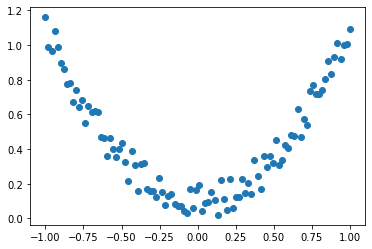

In [4]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [8]:
# 定义网络, 继承 Module 模块:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()  # madantory
        
        # 搭建图
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # 搭建前向计算过程
        x = torch.relu(self.hidden(x))  # in: n_features, out: n_hidden
        x = self.predict(x)             # in: n_hidden, out: n_output
        return x

In [9]:
# 创建实例
net = Net(1, 10, 1)  # n_feature: 1, n_hidden: 10, n_output: 1
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [10]:
# 定义优化器与损失函数
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # 均方误差

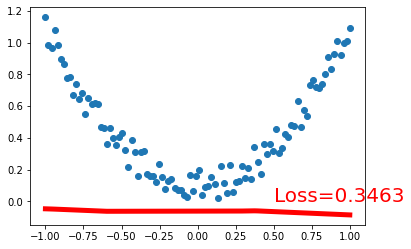

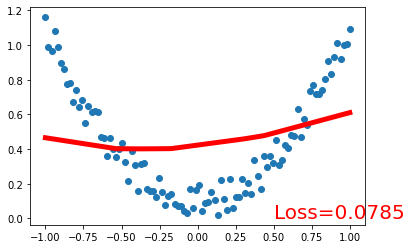

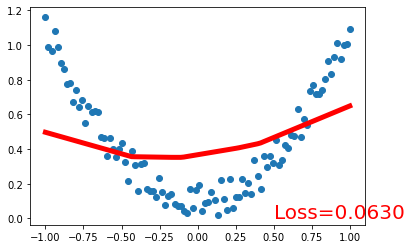

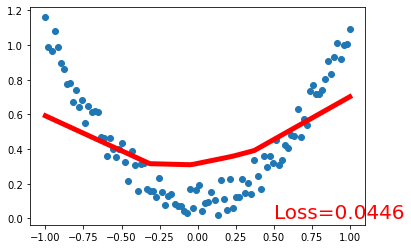

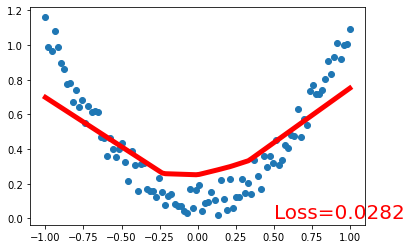

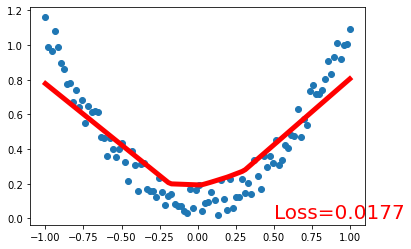

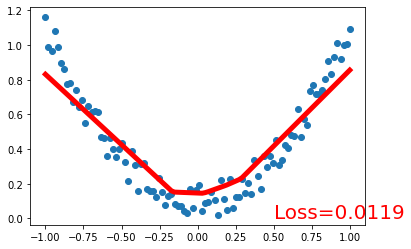

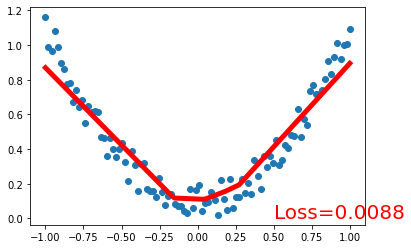

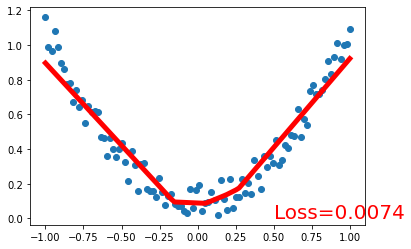

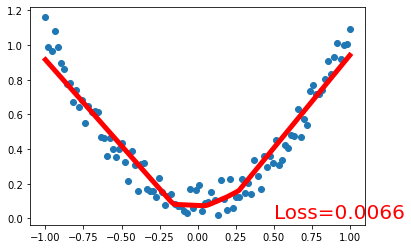

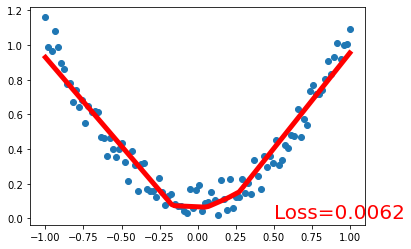

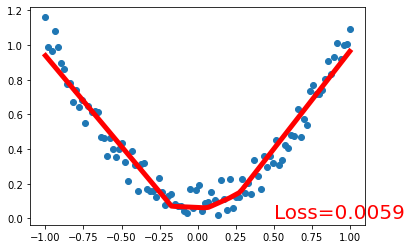

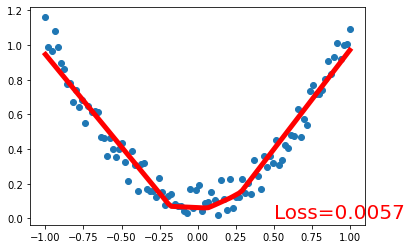

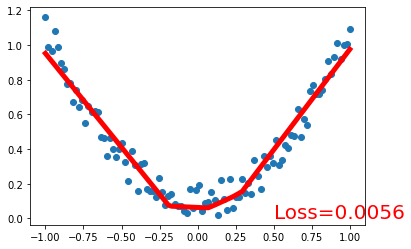

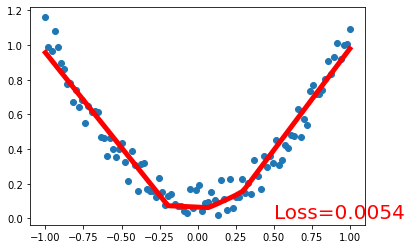

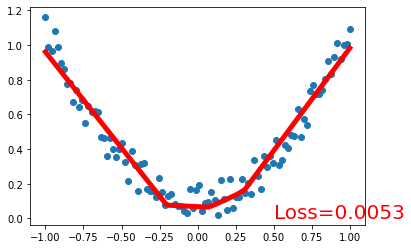

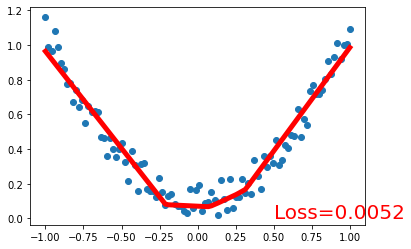

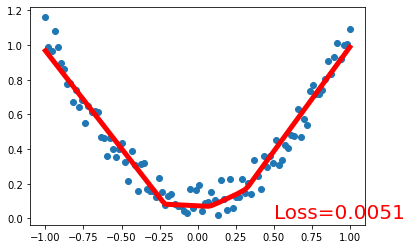

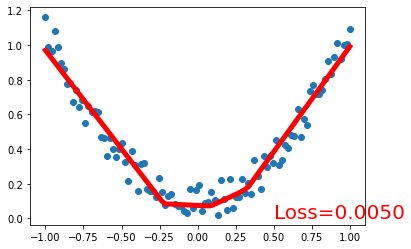

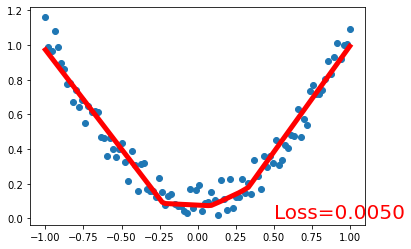

In [11]:
plt.ion()   # something about plotting

# 训练网络
for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction, y)  # y 一定要在后
    
    optimizer.zero_grad()  # 梯度置零
    loss.backward()  # 梯度反响传播
    optimizer.step()  # 优化梯度
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()